In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('1250_dataset.csv')

In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
phi_d,1244.0,0.715273,0.181195,0.400000,0.600000,0.700000,0.900000,1.000000
df,1244.0,0.301045,0.067412,0.150000,0.250000,0.350000,0.350000,0.350000
j_d,1244.0,0.401688,0.229916,0.100000,0.200000,0.400000,0.600000,0.900000
j,1244.0,0.540595,0.303016,0.000000,0.300000,0.600000,0.800000,1.000000
phi_op,1244.0,0.780754,0.353577,0.189000,0.527000,0.692500,1.002000,2.641000
eta_is,1244.0,0.703720,0.085383,0.372700,0.645650,0.711150,0.777825,0.837700
psi_op,1244.0,0.421211,0.270438,0.082000,0.262000,0.357500,0.473000,1.926000
psi_d,1244.0,0.165125,0.088795,0.045000,0.095000,0.140000,0.225000,0.495000
dp_out,1244.0,-804.798405,1181.989114,-6464.442444,-1309.049595,-404.027653,0.000000,1616.110611
rpm,1244.0,18814.308682,5079.901028,15000.000000,15000.000000,15000.000000,20000.000000,30000.000000


In [7]:
df.drop(['dp_out','m_rat','nv','psi_op','psi_d','rpm'],axis=1,inplace=True)

In [9]:
df.head()

,phi_d,df,j_d,j,phi_op,eta_is
0,1.0,0.15,0.8,1.0,2.641,0.6544
1,1.0,0.15,0.8,0.9,2.525,0.7002
2,1.0,0.15,0.8,0.8,2.412,0.7270
3,0.9,0.15,0.7,1.0,2.397,0.6644
4,1.0,0.15,0.8,0.7,2.317,0.7453


<Axes: xlabel='eta_is', ylabel='Count'>

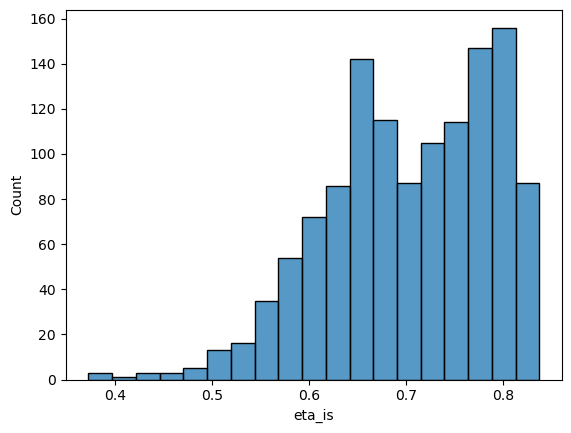

In [11]:
sns.histplot(df['eta_is'])

# Train Test Split

In [14]:
X=df.drop(['eta_is'],axis=1)
y=df['eta_is']

In [16]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=101)

### Scaling

In [21]:
from sklearn.preprocessing import MinMaxScaler

In [23]:
scaler = MinMaxScaler()

In [25]:
X_train= scaler.fit_transform(X_train)

In [27]:
X_test = scaler.transform(X_test)

In [29]:
X_train.shape

(870, 5)

In [31]:
X_test.shape

(374, 5)

## Creating a Model

In [34]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

In [36]:
model = Sequential()

model.add(Dense(10,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

In [38]:
model.fit(x=X_train,y=y_train.values,
          validation_data=(X_test,y_test.values),
          epochs=400)

Epoch 1/400
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.2752 - val_loss: 0.1004
Epoch 2/400
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0729 - val_loss: 0.0164
Epoch 3/400
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0144 - val_loss: 0.0139
Epoch 4/400
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0126 - val_loss: 0.0128
Epoch 5/400
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0121 - val_loss: 0.0120
Epoch 6/400
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0108 - val_loss: 0.0112
Epoch 7/400
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0095 - val_loss: 0.0104
Epoch 8/400
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0090 - val_loss: 0.0097
Epoch 9/400
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0090 - val_loss: 0.0093
Epoch 10/400
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0080 - val_loss: 0.0086
Epoch 11/400
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0084 - val_loss: 0.0081
Epoch 12/400
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0

28/28 [==============================] - 0s 1ms/step - loss: 0.0014 - val_loss: 0.0014
Epoch 325/400
28/28 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0014
Epoch 326/400
28/28 [==============================] - 0s 1ms/step - loss: 0.0013 - val_loss: 0.0015
Epoch 327/400
28/28 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0014
Epoch 328/400
28/28 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0014
Epoch 329/400
28/28 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0014
Epoch 330/400
28/28 [==============================] - 0s 2ms/step - loss: 0.0014 - val_loss: 0.0015
Epoch 331/400
28/28 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0015
Epoch 332/400
28/28 [==============================] - 0s 1ms/step - loss: 0.0014 - val_loss: 0.0018
Epoch 333/400
28/28 [==============================] - 0s 2ms/step - loss: 0.0014 - val_loss: 0.0014
Epoc

<Axes: >

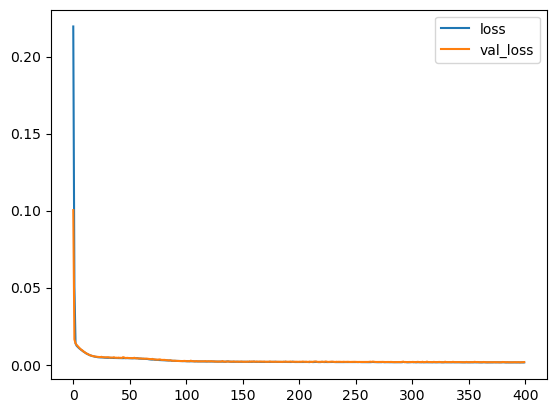

In [40]:
losses = pd.DataFrame(model.history.history)
losses.plot()

# Evaluation on Test Data

In [43]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score

In [45]:
predictions = model.predict(X_test)
mean_absolute_error(y_test,predictions)

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


0.03113283822294225

In [47]:
np.sqrt(mean_squared_error(y_test,predictions))

0.04114357176896801

In [49]:
explained_variance_score(y_test,predictions)

0.800028003415483

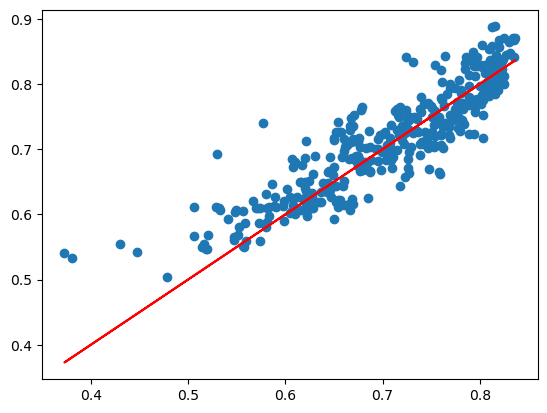

In [51]:
# Our predictions
plt.scatter(y_test,predictions)

# Perfect predictions
plt.plot(y_test,y_test,'r')

C:\Users\RahmatPariyan\AppData\Local\Temp\ipykernel_13348\736146489.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(errors)


<Axes: ylabel='Density'>

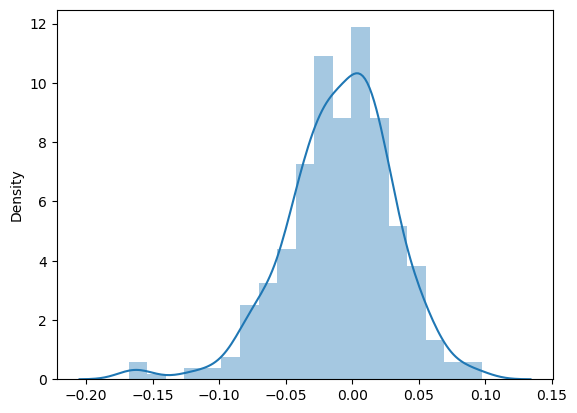

In [53]:
errors = y_test.values.reshape(374, 1) - predictions
sns.distplot(errors)

## Save Scaler and Model

In [56]:
import pickle as pkl

In [58]:
with open("scaler.pkl", "wb") as outfile:
    pkl.dump(scaler, outfile)

In [60]:
model.save('ml_eta.keras')

In [62]:
print(scaler)

MinMaxScaler()


## Load the model and predict with new operating points

In [68]:
from tensorflow.keras.models import load_model

In [70]:
ml_eta_model = load_model("ml_eta.keras")

In [72]:
# Create ml_eta_input from op_points
phi_d = [1, 0.9]
df = [0.15, 0.15]
j_d = [0.8, 0.7]
j = [1.0, 1.0]
phi_op = [2.641, 2.397]
ml_eta_input = np.array([phi_d, df, j_d, j, phi_op])
ml_eta_input = ml_eta_input.transpose()

In [78]:
# Predict isentropic efficiency with the new operating points
ml_eta_input = scaler.transform(ml_eta_input)
eta = ml_eta_model.predict(ml_eta_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


C:\Users\RahmatPariyan\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [80]:
print(eta)

[[0.7419572 ]
 [0.74636614]]
